## Bank loan Modeling

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [7]:
df = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', sheet_name=1)
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### Check for NULL values,drop irrelevant columns

In [9]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [10]:
df = df.drop(['ID','ZIP Code'], axis=1)
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


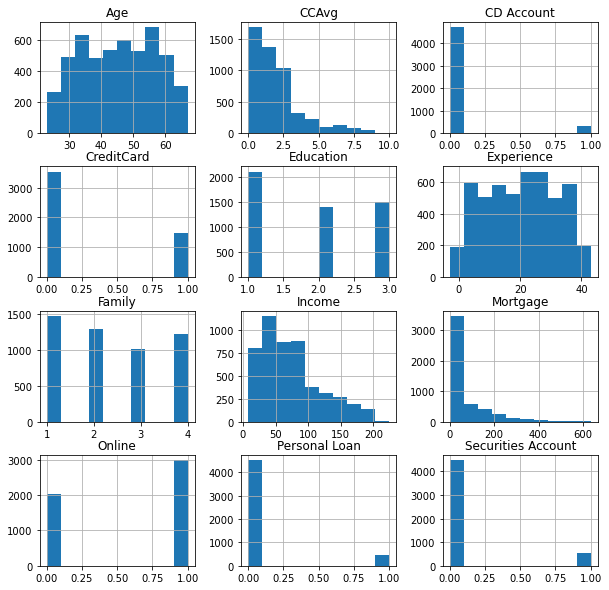

In [12]:
df.hist(figsize=(10,10))
plt.show()

### Correlation Matrix

<AxesSubplot:>

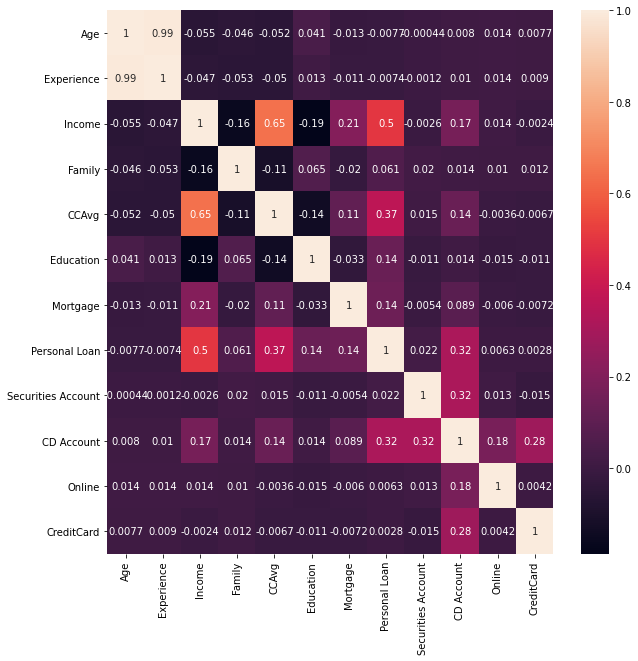

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True)

### Infernece from Correlation Matrix:
1)Personal Loan has Moderate Correlation with CD Account(0.32), CCAvg(0.37), Income(0.5)

2)Personal Loan has Almost No Correlation with other Independent Variables.

### Applying Decision Tree

In [14]:
from sklearn import tree
from sklearn import preprocessing

In [15]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


### Splitting data

In [16]:
x = df.drop(['Personal Loan'], axis=1)
x.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [18]:
y = df.iloc[:, 7:8]
y.head()

,Personal Loan
0,0
1,0
2,0
3,0
4,0


### Train the model using Decision Tree

In [19]:
model = tree.DecisionTreeClassifier(max_depth=22)
model.fit(x,y)

DecisionTreeClassifier(max_depth=22)

In [20]:
model.score(x,y)

1.0

### Applying Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000, max_features=2, oob_score=True)
rf.fit(x,y)

RandomForestClassifier(max_features=2, n_estimators=1000, oob_score=True)

### Checking Score

In [23]:
rf.oob_score_

0.9874

### Finding relevant features

In [25]:
a = ['Age', 'Experience', 'Income','Family', 'CCAvg','Education', 'Mortgage', 'Securities Account','CD Account', 
     'Online', 'CreditCard']

for feature, imp in zip(a, rf.feature_importances_):
    print(feature,"=> : ",imp);

Age => :  0.044276578833962445
Experience => :  0.043979152788655364
Income => :  0.3453936266726222
Family => :  0.09686622626874118
CCAvg => :  0.18311750674447122
Education => :  0.16705286260642302
Mortgage => :  0.042170078679150645
Securities Account => :  0.005425954173918955
CD Account => :  0.05365944128968293
Online => :  0.008212889814073929
CreditCard => :  0.009845682128298158


### Inference:
Income, CCAvg, Education, Family have value more than 0.05 ie, They are Important feature and affect the prediction of Personal Loan

### Spliting Dataset according to Important Columns

In [26]:
imp = df[['Income','CCAvg','Education','Family']]
imp.head()

,Income,CCAvg,Education,Family
0,49,1.6,1,4
1,34,1.5,1,3
2,11,1.0,1,1
3,100,2.7,2,1
4,45,1.0,2,4


In [27]:
y.head()

,Personal Loan
0,0
1,0
2,0
3,0
4,0


### Fitting Decision Tree

In [28]:
model = tree.DecisionTreeClassifier(max_depth=6)
model.fit(imp,y)

DecisionTreeClassifier(max_depth=6)

### Creating Tree

In [31]:
with open('banking_tree.dot','w') as f:
    f = tree.export_graphviz(model, feature_names=['Income','CCAvg','Education','Family'], out_file=f);

### Inference 

<img src="bank_tree.png" width="800" />

### Predicting score

In [33]:
model.score(imp,y)

0.988

### Fitting Random forest

In [35]:
rf.fit(imp,y)

RandomForestClassifier(max_features=2, n_estimators=1000, oob_score=True)

In [36]:
rf.oob_score_

0.9872

### Inference drawn
The Accuracy score remains aproximately same in case of Random Forest while predicting on Important Columns than predicting on All Columns.
The Data is Not overfitted as in the first case of prediction using Decision Tree ( prediction of all columns : accuracy = 100%)